# Петров Сергей Дмитриевич, Вариант 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Начальные условия и прочее

In [3]:
N = 200
dims = 2

# Вектора математических ожиданий
M1 = np.array([0, 0])
M2 = np.array([1, 1])
M3 = np.array([-1, 1])

# Матрицы корреляции
B_diag_symm = np.array(
    [
        [0.1, 0],
        [0, 0.1]
    ]
)

B_diag_asymm = np.array(
    [
        [0.01, 0],
        [0, 0.06]
    ]
)

# Случайные вектора из нормального распределения
var_xi = np.random.randn(N, dims)

## Функции для получения векторов имеющих нормальное распределение

In [4]:
def create_a(B):

    # Частный случай для двумерных векторов
    a = np.array([
        [np.sqrt(B[0][0]), 0],
        [B[0][1] / np.sqrt(B[0][0]), np.sqrt(B[1][1] - B[0][1]**2 / B[0][0] )]
    ])
    
    return a

def calc_x(var_xi, M, B):
    a = create_a(B)
    return np.dot(var_xi, a) + M


## Метрики

In [5]:
def calc_p_b(M1, M2, B1, B2):
    b_sum = (B2 + B1) / 2
    inv_b_sum = np.linalg.inv(b_sum)
    m_diff = M2 - M1
    return (
        np.dot(np.dot(m_diff.T, inv_b_sum), m_diff) / 4
        + np.log(np.linalg.det(b_sum) / np.sqrt(np.linalg.det(B1) * np.linalg.det(B2)))
        / 2
    )

## Вспомогательные функции

In [6]:
def show_pair_of_vectors(var_xi, M1, M2, B1, B2):
    x1 = calc_x(var_xi, M1, B1)
    x2 = calc_x(var_xi, M2, B2)

    add_x_on_plot(x1)
    add_x_on_plot(x2)

    pb = calc_p_b(M1, M2, B1, B2)

    print(f"Pb = {pb}")

    plt.show()

def diag_flip(matrix):
    m = matrix.copy()
    m[0][0], m[1][1] = m[1][1], m[0][0]
    return m


def add_x_on_plot(x, ax = plt):
    ax.scatter(x[:, 0], x[:, 1])

## Выполнение задач лабораторной работы

### Задача 2
    Смоделировать и изобразить графически обучающие выборки объема N=200 для двух нормально распределенных двумерных случайных векторов с заданными математическими ожиданиями и  самостоятельно подобранными равными корреляционными матрицами

Pb = 5.0


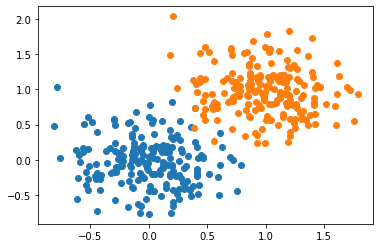

Pb = 10.0


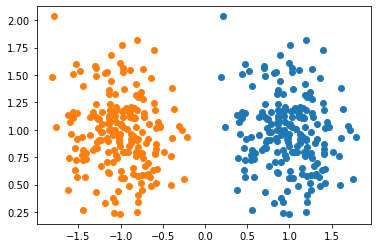

Pb = 5.0


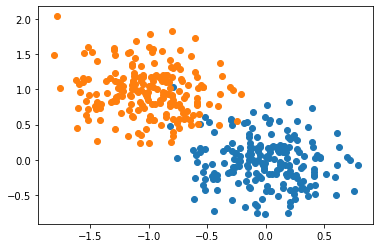

In [7]:
show_pair_of_vectors(var_xi, M1, M2, B_diag_symm, B_diag_symm)
show_pair_of_vectors(var_xi, M2, M3, B_diag_symm, B_diag_symm)
show_pair_of_vectors(var_xi, M1, M3, B_diag_symm, B_diag_symm)

### Задача 3
    Смоделировать и изобразить графически обучающие выборки объема N=200 для трех нормально распределенных двумерных случайных векторов с заданными математическими ожиданиями и с неравными корреляционными матрицами, которые выбрать самостоятельно. 

Pb = 14.642597519595627


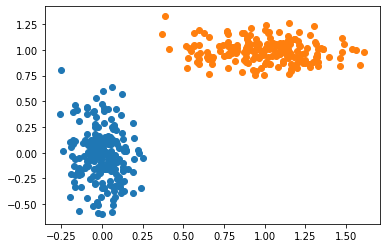

Pb = 28.928311805309914


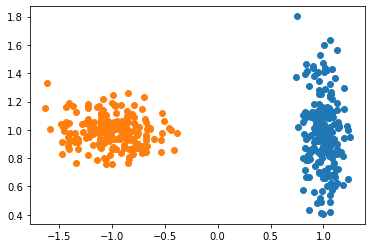

Pb = 14.642597519595627


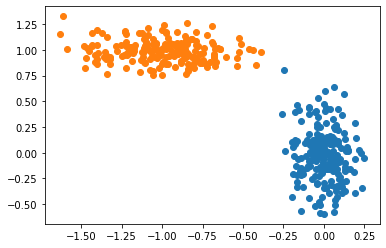

In [8]:
show_pair_of_vectors(var_xi, M1, M2, B_diag_asymm, diag_flip(B_diag_asymm))
show_pair_of_vectors(var_xi, M2, M3, B_diag_asymm, diag_flip(B_diag_asymm))
show_pair_of_vectors(var_xi, M1, M3, B_diag_asymm, diag_flip(B_diag_asymm))

### Задача 4
    На основании полученных выборок найти точечные оценки параметров нормального закона для каждого из распределений. 

In [9]:
def calc_M_hat(x):
    return x.sum(axis = 0)/N

def calc_B_hat(x):
    M_hat= calc_M_hat(x)
    
    first = (x-M_hat)
    return np.dot(first.T, first)/ N

Предсказанные матрицы $\bar{M}$ и $\bar{B}$ равны для для каждого $M_i$ и $B_i$ так как $\xi$ одинаковые

In [10]:
print(f"Разница между действительным и предсказанным вектором мат ожиданий для вектора 1  = {calc_M_hat(calc_x(var_xi, M1, B_diag_symm)) - M1}")
print(f"Разница между действительным и предсказанным вектором мат ожиданий для вектора 2  = {calc_M_hat(calc_x(var_xi, M2, B_diag_symm)) - M2}")
print(f"Разница между действительным и предсказанным вектором мат ожиданий для вектора 3  = {calc_M_hat(calc_x(var_xi, M3, B_diag_symm)) - M3}")

Разница между действительным и предсказанным вектором мат ожиданий для вектора 1  = [-0.00298645 -0.02637063]
Разница между действительным и предсказанным вектором мат ожиданий для вектора 2  = [-0.00298645 -0.02637063]
Разница между действительным и предсказанным вектором мат ожиданий для вектора 3  = [-0.00298645 -0.02637063]


In [11]:
delta = calc_B_hat(calc_x(var_xi, M1, B_diag_symm)) - B_diag_symm
print(f"Разница между действительными и предсказанными матрицами корреляции \n на векторе мат ожидания 1:\n\t{delta[0]}\n\t{delta[1]}")


Разница между действительными и предсказанными матрицами корреляции 
 на векторе мат ожидания 1:
	[ 0.0031488  -0.01260525]
	[-0.01260525  0.01209664]


In [12]:
delta = calc_B_hat(calc_x(var_xi, M1, B_diag_asymm)) - B_diag_asymm
print(f"Разница между действительными и предсказанными матрицами корреляции \n на векторе мат ожидания 1:\n\t{delta[0]}\n\t{delta[1]}")

Разница между действительными и предсказанными матрицами корреляции 
 на векторе мат ожидания 1:
	[ 0.00031488 -0.00308764]
	[-0.00308764  0.00725798]


### Задача 5
    Смоделировать обучающие выборки объема N=200 двух бинарных случайных векторов с распределениями, которые обеспечивают вероятность изменения указанной в представителе компоненты случайного вектора, равной p = 0.3

Не очень понял

In [16]:
bin_dims = 10
p = 0.3

def create_bin_vec(p):
    return (np.random.random([N, bin_dims]) < p).astype(int);

In [17]:
create_bin_vec(p)

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1]])